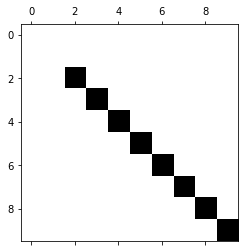

True

In [1]:
#Literature:
#    Sahuck Oh - An Efficient Spectral Method to SolveMulti-Dimensional 
#    Linear Partial Different EquationsUsing Chebyshev Polynomials

from numpy.linalg import solve
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.linalg as sla
from pypde.bases.utils import to_sparse
from pypde.bases.chebyshev import *
from scipy.sparse import diags
from pypde.bases.dmsuite import pseudoinverse_spectral

def pm(A):
    np.set_printoptions(formatter={'float': "{: 1.2e}\t".format})
    print(A)
    np.set_printoptions()
    
N = 10
xf = Chebyshev(N)
D = xf.stiff.toarray()
D = xf.spec_deriv_mat(2)
M = xf.mass.toarray()
B = pseudoinverse_spectral(N)

C = to_sparse(B@D).toarray()
C = np.diag(np.diag(C))
#C[np.abs(C)<1e-10] = 0
plt.spy(C)
plt.show()

Di = np.linalg.pinv(D)
np.allclose(Di,B)

(10, 8)


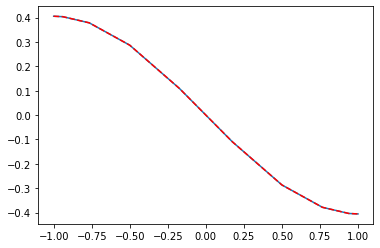

In [2]:
def f(x):
        return np.sin(1*np.pi/2*x)

xh = Chebyshev(N)
xf = ChebNeumann(N)
x =  xf.x
M  = xf.mass.toarray()
D2 = xf.stiff.toarray()
lhs = D2


rhs = xh.forward_fft( f(x) )



A = to_sparse( B@D ).toarray()@xf.stencil(True)
g = B@rhs
print(A.shape)

vhat = np.zeros(g.size-2)
vhat[1:] = np.linalg.solve(A[3:,1:],g[3:])
v = xf.backward_fft(vhat)
plt.plot(xf.x,v/1)
plt.plot(x,-f(x)*(np.pi/2)**-2, "r--")
plt.show()

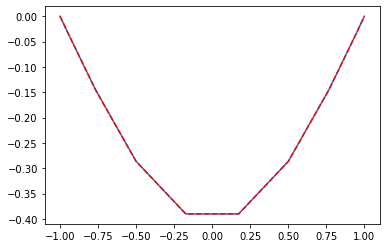

In [3]:
def f(x):
        return np.cos(1*np.pi/2*x)

xf = ChebDirichlet(N)
x =  xf.x
M  = xf.mass.toarray()
D2 = xf.stiff.toarray()
lhs = D2

rhs = xf.forward_fft( f(x) )
g = M@rhs

vhat = np.linalg.solve(D2,g)

v = xf.backward_fft(vhat)

plt.plot(xf.x,v/1)
plt.plot(x,-f(x)*(np.pi/2)**-2, "r--")
plt.show()

(8, 8)


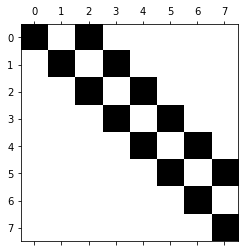

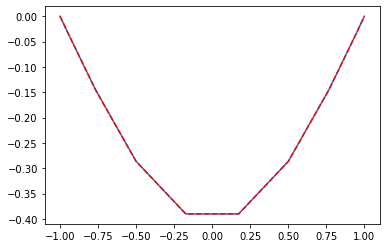

In [4]:
def f(x):
        return np.cos(1*np.pi/2*x)

xh = Chebyshev(N)
xf = ChebDirichlet(N)
x =  xf.x
M  = xf.mass.toarray()
D2 = xf.stiff.toarray()
lhs = D2


rhs = xh.forward_fft( f(x) )


A = to_sparse( B@D@xf.stencil(True) ).toarray()[2:,:]
g = (B@rhs)[2:]
print(A.shape)
plt.spy(A)
plt.show()

vhat = np.zeros(g.size-2)
vhat = np.linalg.solve(A,g)
v = xf.backward_fft(vhat)
plt.plot(xf.x,v)
plt.plot(x,-f(x)*(np.pi/2)**-2, "r--")
plt.show()

## Sparse

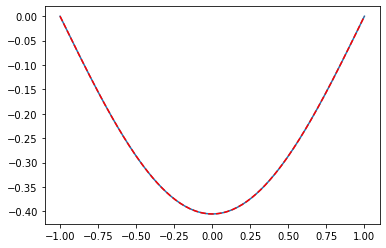

In [6]:
from pypde.solver.fortran import linalg as lafort
_twodia = lafort.tridiagonal.solve_dia_0plus2_1d

def f(x):
        return np.cos(1*np.pi/2*x)
N = 200

xh = Chebyshev(N)
xf = ChebDirichlet(N)
x =  xf.x
M  = xf.mass.toarray()
D2 = xf.stiff.toarray()
lhs = D2
D  = xh.spec_deriv_mat(2)
B  = xh.spec_deriv_mat_inverse(2)

rhs = xh.forward_fft( f(x) )


A = to_sparse( B@D@xf.stencil(True) ).toarray()[2:,:]
g = (B@rhs)[2:]
d = np.diag(A,0)
u1 = np.diag(A,2)


_twodia(d,u1,g,0)
v = xf.backward_fft(g)
plt.plot(xf.x,v)
plt.plot(x,-f(x)*(np.pi/2)**-2, "r--")
plt.show()

In [ ]:
#C = to_sparse(B[:-2,:-2]@D2).toarray()
C = to_sparse( B@D@xf.stencil(True) ).toarray()[2:,:]

plt.spy(C)
plt.show()

In [ ]:


d = np.diag(C,0)
u1 = np.diag(C,2)
u1
#print(C)

## Helmholtz

array([[ 0.41666667,  0.        , -0.20833333,  0.        ,  0.04166667,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.10416667,  0.        , -0.08333333,  0.        ,
         0.02083333,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.02083333,  0.        ,  0.05416667,  0.        , -0.04583333,
         0.        ,  0.0125    ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        , -0.0125    ,  0.        ,  0.03333333,  0.        ,
        -0.02916667,  0.        ,  0.00833333,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.00833333,  0.        ,  0.02261905,
         0.        , -0.0202381 ,  0.        ,  0.00595238,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.      

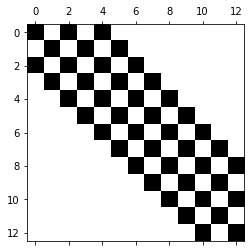

In [22]:
import numpy as np
from pypde.bases.chebyshev import *
from numpy.linalg import solve
import scipy.sparse as sp
import scipy.sparse.linalg as sla
from pypde.solver.fortran import linalg as lafort

def f(x):
        return np.cos(1*np.pi/2*x)
    
N = 15
xh = Chebyshev(N)
xf = ChebDirichlet(N)
x =  xf.x
M  = xf.mass.toarray()
D2 = xf.stiff.toarray()
lhs = D2
D  = xh.spec_deriv_mat(2)
B  = xh.spec_deriv_mat_inverse(2)
S  = xf.stencil(True) # Transform stencil

A = to_sparse((B@D@S)[2:,:]).toarray()
BS =(B@S)[2:,:]
plt.spy(BS+A)
BS

True

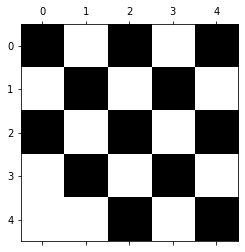

In [32]:
import numpy as np
from pypde.solver.fortran import linalg as lafort
_fdma = lafort.tridiagonal.solve_fdma
from scipy.sparse import diags
import matplotlib.pyplot as plt

N = 5
d = np.random.random(N)
u1 = np.random.random(N-2)
u2 = np.random.random(N-4)
l  = np.random.random(N-2)

A = np.diag(d,0)+np.diag(u1,2)+np.diag(u2,4)+np.diag(l,-2)
plt.spy(A)
d = np.diag(A,0).copy()
u1 = np.diag(A,2).copy()
u2 = np.diag(A,4).copy()
l = np.diag(A,-2).copy()



FDMA_LU(l, d, u1, u2)

b = np.random.rand(N)

x0 = np.linalg.solve(A,b)

bb = b.copy()
_fdma(d,u1,u2,l,bb,0)

cc = b.copy()
FDMA_Solve(d,u1,u2,l,cc,0)

np.allclose(x0,bb)

In [33]:
print(x0)
np.allclose(A@x0,b)


[ 0.24424416 -0.94619845  1.26866055  0.9725194   0.75728426]


True

In [34]:
print(bb)
np.allclose(A@bb,b)


[ 0.24424416 -0.94619845  1.26866055  0.9725194   0.75728426]


True

In [35]:
print(cc)
np.allclose(A@cc,b)


[ 0.24424416 -0.94619845  1.26866055  0.9725194   0.75728426]


True

In [30]:
def FDMA_Solve(d, u1, u2, l, x, axis=0):
        assert x.ndim == 1, "Use optimized version for multidimensional solve"
        n = d.shape[0]
        for i in range(2, n):
            x[i] -= l[i-2]*x[i-2]

        x[n-1] = x[n-1]/d[n-1]
        x[n-2] = x[n-2]/d[n-2]
        x[n-3] = (x[n-3] - u1[n-3]*x[n-1])/d[n-3]
        x[n-4] = (x[n-4] - u1[n-4]*x[n-2])/d[n-4]
        for i in range(n - 5, -1, -1):
            x[i] = (x[i] - u1[i]*x[i+2] - u2[i]*x[i+4])/d[i]
            
def FDMA_LU(ld, d, u1, u2):
        n = d.shape[0]
        for i in range(2, n):
            ld[i-2] = ld[i-2]/d[i-2]
            d[i] = d[i] - ld[i-2]*u1[i-2]
            if i < n-2:
                u1[i] = u1[i] - ld[i-2]*u2[i-2]